# Ejercicios extra visualización

Se pedirá realizar graficos con distintos dataset. Es importante que cada uno de ellos cuente con un título y los respectivos nombres en sus ejes.


## 1. Serie de tiempo

Se pide realizar un análisis exploratorio de una serie de datos macroeconomicos, para ello es necesario visualizar la serie y otros gráficos descriptivos de la misma que se indicarán a continuación.

In [1]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/data_macro.csv',sep=',')

### 1.1
Graficar la serie de importaciones, en el eje de las abscisas deben ir los años, mientras que en el de las ordenadas la cantidad importada.

In [3]:
df.sample(10)

,Unnamed: 0,Año,Trimestre,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
51,51,2016,IV,707.661,190.411,140.741,517.890,97.746
46,46,2015,III,727.260,182.950,140.967,523.542,97.945
4,4,2005,I,515.446,89.021,128.989,321.890,57.651
37,37,2013,II,721.262,193.916,155.311,516.388,87.374
62,62,2019,III,695.824,166.804,157.587,492.970,94.606
20,20,2009,I,605.434,114.868,143.147,407.647,70.569
24,24,2010,I,645.641,139.225,141.931,437.236,75.617
58,58,2018,III,698.942,196.468,137.518,509.536,94.483
30,30,2011,III,714.666,199.472,164.694,508.237,81.790
53,53,2017,II,719.488,208.390,144.378,536.686,99.015


In [7]:
df.describe()

,Unnamed: 0,Año,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,31.500000,2011.500000,657.616969,156.705766,143.946438,460.150297,80.383109
std,18.618987,4.646214,73.668359,40.948006,12.678413,71.716057,14.607297
min,0.000000,2004.000000,469.984000,76.726000,110.908000,301.075000,52.471000
25%,15.750000,2007.750000,615.425500,120.099000,136.724500,411.005500,68.135750
50%,31.500000,2011.500000,693.220500,167.646500,142.854500,491.665500,82.015000
75%,47.250000,2015.250000,712.038000,186.293750,153.664500,517.251750,94.553500
max,63.000000,2019.000000,737.842000,234.093000,166.335000,557.823000,99.659000


In [18]:
df.groupby('Año').agg({'Importaciones_D':'sum'})

,Importaciones_D
Año,
2004,326.872
2005,378.674
2006,420.298
2007,502.846
2008,571.043
2009,465.877
2010,629.886
2011,768.641
2012,732.298


### 1.2

Graficar los cierres anuales para exportaciones, importaciones, consumo publico, consumo privado y PBI. Recuerde incorporar los años en el eje horizontal.

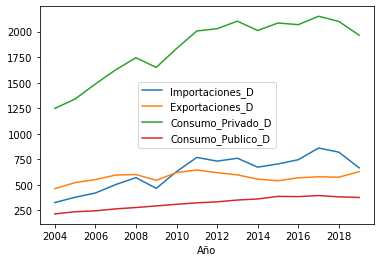

In [19]:
df.groupby('Año').agg({'Importaciones_D':'sum',
                       'Exportaciones_D':'sum',
                       'Consumo_Privado_D':'sum',
                       'Consumo_Publico_D':'sum'}).plot()

### 1.3 
Graficar la serie de exportaciones junto a su media movil y su desvio estandar móvil.

In [20]:
import numpy as np

In [24]:
# Consejo: utilizar las funciones np.rolling

df['exportaciones_mm'] = df["Exportaciones_D"].rolling(2).mean()
df['exportaciones_dem'] = df["Exportaciones_D"].rolling(2).std()
df
#desvio_movil = 

,Unnamed: 0,Año,Trimestre,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D,exportaciones_mm,exportaciones_dem
0,0,2004,I,475.774,76.726,110.908,301.075,52.471,NaN,NaN
1,1,2004,II,469.984,80.629,114.546,305.247,52.962,112.7270,2.572454
2,2,2004,III,493.773,82.344,117.306,317.382,54.495,115.9260,1.951615
3,3,2004,IV,500.929,87.173,119.994,324.624,55.747,118.6500,1.900703
4,4,2005,I,515.446,89.021,128.989,321.890,57.651,124.4915,6.360425
...,...,...,...,...,...,...,...,...,...,...
59,59,2018,IV,692.198,176.589,151.873,498.711,94.536,144.6955,10.150518
60,60,2019,I,694.243,172.334,155.735,491.686,95.758,153.8040,2.730846
61,61,2019,II,689.175,168.489,153.563,491.499,94.743,154.6490,1.535836
62,62,2019,III,695.824,166.804,157.587,492.970,94.606,155.5750,2.845398


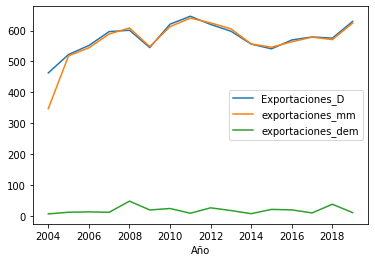

In [26]:
df.groupby('Año').agg({'Exportaciones_D':'sum',
                       'exportaciones_mm':'sum',
                       'exportaciones_dem':'sum'}).plot()

## 2. Iris Dataset

Utilizando el [Iris Dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), una base de datos que contiene información acerca de tres especies de flores distintas, vamos realizar algunos gráficos para entender mejor su comportamiento. Este dataset es ampliamente utilizado en el ámbito academico para la práctica de visualización de datos, es recomendable que investiguen y vean los distintos trabajos realizados sobre el mismo. 

In [27]:
df = pd.read_csv("https://datasets-humai.s3.amazonaws.com/datasets/data_iris.csv")

In [30]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2.1 
Graficar las distribución del largo del sepalo.

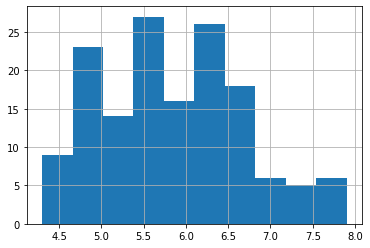

In [37]:
df['SepalLengthCm'].hist()

# 2.2
Graficar la función de densidad del largo del sépalo.

In [57]:
df_group1 = df.groupby('SepalLengthCm')['SepalLengthCm'].count()

df_group1.head()

SepalLengthCm
4.3    1
4.4    3
4.5    1
4.6    4
4.7    2
Name: SepalLengthCm, dtype: int64

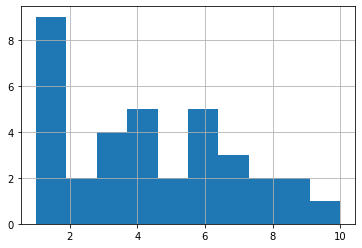

In [58]:
df_group1.hist()

## 3. Plotly

In [59]:
import plotly.graph_objects as go
import plotly.express as px

### 3.1

Con plotly express realizar un gráfico de dispersion donde el eje de ordenadas explique el largo del sepalo y el eje de abscisas explique el largo del pétalo con cada una de las especies.

### 3.2

Realizar lo mismo que en el 3.1 pero con un *objeto gráfico* de plotly. Vemos que podemos hacer una mayor personalización.

In [ ]:
# Especie versicolor
traza1 = 

# Especie setosa
traza2 = 

# Especies virginica
traza3 = 

## Extra

### Visulización de imagenes

Utilizando una imagen que tengan guardada en su computadora, vamos a visualizarla.

In [65]:
import matplotlib.image as mpimg

img = mpimg.imread('C:\Users\lucas\Google Drive\Familia\CUESTA\SPAJIC')

SyntaxError: ignored

In [ ]:
print(img)

Utilice la función plt.imshow para visualizar la imagen.